In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [4]:
# Read in CSVs
hate_crimes_by_socioeconomic = pd.read_csv("./data/hate_crimes.csv")
motivation_by_num_situation = pd.read_csv("./data/table_1_incidents_offenses_victims_and_known_offenders_by_bias_motivation_2016.csv").drop(["Unnamed: 5", "Unnamed: 6", "Unnamed: 7"], axis = 1)
offense_type_by_situation = pd.read_csv("./data/table_2_incidents_offenses_victims_and_known_offenders_by_offense_type_2016.csv").drop(["Unnamed: 5", "Unnamed: 6"], axis = 1)
offense_type_by_offender_race = pd.read_csv("./data/table_3_offenses_known_offenders_race_and_ethnicity_by_offense_type_2016.csv")
motivation_by_crime_type = pd.read_csv("./data/table_4_offenses_offense_type_by_bias_motivation_2016.csv")
motivation_by_offender_race = pd.read_csv("./data/table_5_offenses_known_offenders_race_and_ethnicity_by_bias_motivation_2016.csv").drop(["Unnamed: 14", "Unnamed: 15", " "], axis = 1)
location_by_motivation = pd.read_csv("./data/table_10_incidents_bias_motivation_by_location_2016.csv").drop(["Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12"], axis = 1)
state_by_crime_type = pd.read_csv("./data/table_11_offenses_offense_type_by_participating_state_2016.csv")


In [34]:
no_HI = hate_crimes_by_socioeconomic[hate_crimes_by_socioeconomic.state != 'Hawaii']
array = no_HI.values
x = array[:,1:10]
y = array[:,10]
y = y.astype('float')
#model = LogisticRegression()
model = LinearRegression()
rfe = RFE(model)
fit = rfe.fit(x, y)


print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
#median_household_income, share_population_in_metro_areas, share_population_with_high_school_degree, share_non_white
# linear regression: share_unemployed_seasonal, shared_population_with_high_school_degree, share_white_poverty, gini_index

columns = "+".join(['share_unemployed_seasonal', 'share_population_with_high_school_degree', 'share_white_poverty', 'gini_index'])

multi_model = smf.ols('hate_crimes_per_100k_splc ~' + (columns), data = no_HI).fit()
multi_model.summary()

Num Features: 4
Selected Features: [False  True False  True False  True  True False False]
Feature Ranking: [6 1 4 1 3 1 1 5 2]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     hate_crimes_per_100k_splc   R-squared:                       0.464
Model:                                   OLS   Adj. R-squared:                  0.417
Method:                        Least Squares   F-statistic:                     9.745
Date:                       Sat, 01 Dec 2018   Prob (F-statistic):           9.16e-06
Time:                               20:17:49   Log-Likelihood:                 14.833
No. Observations:                         50   AIC:                            -19.67
Df Residuals:                             45   BIC:                            -10.11
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -9.5499      1.799     -5.309      0.000     -13.173      -5.927
share_unemployed_seasonal                    4.8572      3.364      1.444      0.156      -1.919      11.633
share_population_with_high_school_degree     6.6298      1.316      5.038      0.000       3.979       9.280
share_white_poverty                          1.1103      1.352      0.821      0.416      -1.613       3.833
gini_index                                   8.2733      1.771      4.672      0.000       4.707      11.840
==============================================================================
Omnibus:                        2.289   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.605
Skew:                           0.430   Prob(JB):                        0.448
Kurtosis:                       3.176   Cond. No.                         182.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
no_HI['multi_preds'] = multi_model.predict()

C:\Users\Miranda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


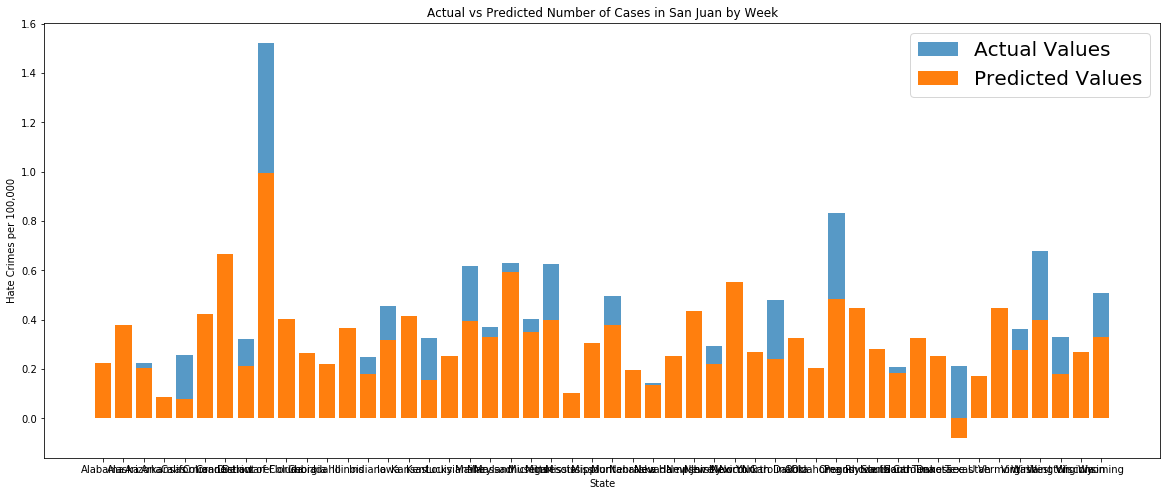

In [40]:
plt.figure(figsize=(20, 8))
plt.bar(no_HI['state'], no_HI['hate_crimes_per_100k_splc'], alpha = .75, label = 'Actual Values')
plt.bar(no_HI['state'], no_HI['multi_preds'], label = 'Predicted Values')
plt.title('Actual vs Predicted Number of Cases in San Juan by Week')
plt.xlabel('State')
plt.ylabel('Hate Crimes per 100,000')
plt.legend(fontsize = 20)
